In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql import functions as F

In [30]:
import matplotlib.pyplot as plt

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!cp /content/drive/MyDrive/MMDS-Data/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("CustomerPersonalityAnalysis") \
      .getOrCreate()

In [22]:
file_path = "marketing_campaign.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)

In [25]:
df.show(5)

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

# Preprocessing/ Cleaning Data

## Find null value in dataset

In [28]:
null_count = df.select([
    count(when(col(c).contains('None') |\
               col(c).contains('NULL') |\
               (col(c) == '') |\
               col(c).isNull() |\
               isnan(c), c
               )).alias(c)
    for c in df.columns
])

null_count.show()

+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
| ID|Year_Birth|Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+---

## Visualizing NULL values in DF

<BarContainer object of 29 artists>

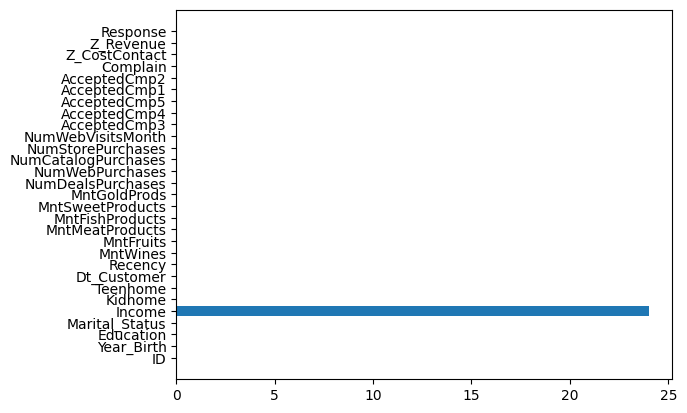

In [36]:
plt.barh(null_count.columns, null_count.collect()[0])

## Drop null example in dataFrame

In [42]:
df = df.na.drop()

In [43]:
null_count = df.select([
    count(when(col(c).contains('None') |\
               col(c).contains('NULL') |\
               (col(c) == '') |\
               col(c).isNull() |\
               isnan(c), c
               )).alias(c)
    for c in df.columns
])

null_count.show()

+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
| ID|Year_Birth|Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+---

## Visualizing NULL data after using df.na.drop() function

<BarContainer object of 29 artists>

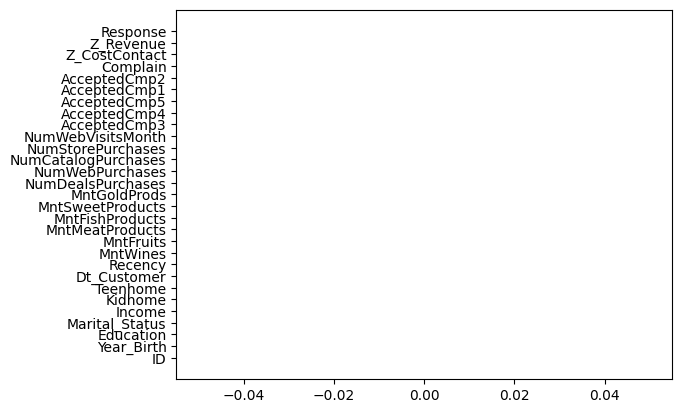

In [44]:
plt.barh(null_count.columns, null_count.collect()[0])

## Processing Datatime format

In [55]:
df = df.withColumn("Year_Birth", F.regexp_replace("Year_Birth", "/", "-"))

df = df.withColumn("Year_Birth", F.col("Year_Birth").cast("date"))